Customer Churn Prediction with Random Forest Overview This project focuses on predicting customer churn for a telecom company using a dataset that includes customer demographics and account information. The goal is to predict whether a customer will churn (leave) based on various features, such as tenure, monthly charges, contract type, and more. The project includes data preprocessing, exploratory data analysis (EDA), feature scaling, model training, and performance evaluation.

# Introduction and Problem Statement

The goal of this analysis is to understand the factors contributing to customer churn in the telecom sector. By analyzing customer data, we aim to:
- Identify key features influencing churn.
- Build robust classification models to predict churn.
- Provide actionable recommendations for customer retention.

This study will help telecom companies better understand customer behavior and implement targeted retention strategies.


# Importing libraries 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    roc_curve, f1_score, recall_score, precision_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.calibration import calibration_curve
from scipy.stats import zscore, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Dataset Overview
The dataset is sourced from the WA_Fn-UseC_-Telco-Customer-Churn.csv, with the following key columns:
* customerID: Unique customer identifier
* Churn: Target variable indicating whether the customer churned (1) or not (0)
* Features: Demographic and account-related attributes like gender, tenure, monthly charges, total charges, contract type, and more.

# 2. Data Exploration and Preprocessing

# Data Loading and Initial Inspection

In [9]:

# Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Inspect data
print(df.head())
print(df.info())
print(df.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data Preprocessing
1. Load and Inspect Data: Load the dataset and inspect basic information such as missing values and descriptive statistics.
2. Handle Missing Data: Missing values in the TotalCharges column are filled with 0, and any non-numeric values are converted.
3. Encode Categorical Variables: Label encoding is applied to all categorical columns except for customerID and Churn.
4. Balancing the dataset


# Data preprocessing - Handling Missing Values

In [10]:
# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
print(f"Missing values after handling: \n{df.isnull().sum()}")


Missing values after handling: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Encoding Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'customerID':
        df[col] = LabelEncoder().fit_transform(df[col])


# Define features and target
# Balancing the dataset

In [12]:
# Define features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# Exploratory Data Analysis (EDA)
1. Churn Distribution: A count plot is used to visualize the distribution of churned vs. non-churned customers.
2. Monthly Charges vs. Churn: A boxplot visualizes how monthly charges vary with churn.
3. Correlation Matrix: A heatmap shows the correlation between numerical features.
4. Gender and Churn: A pie chart visualizes the proportion of churn by gender.
5. Senior Citizen Status and Churn: A pie chart visualizes the churn proportion for senior citizens vs. non-senior citizens.
6. Churn Count by Contract Type: A grouped bar chart visualizes churn count by contract type.
7. Chi-Square Test: A chi-square test is conducted between churn and contract type to check for statistical significance.

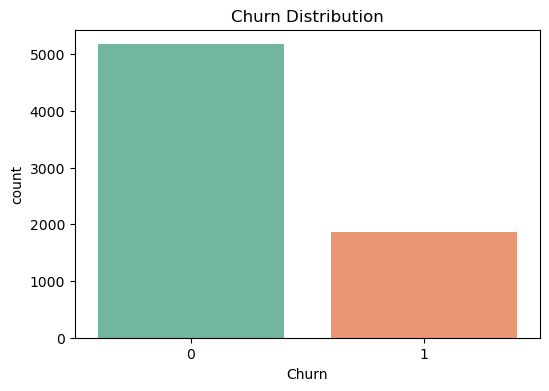

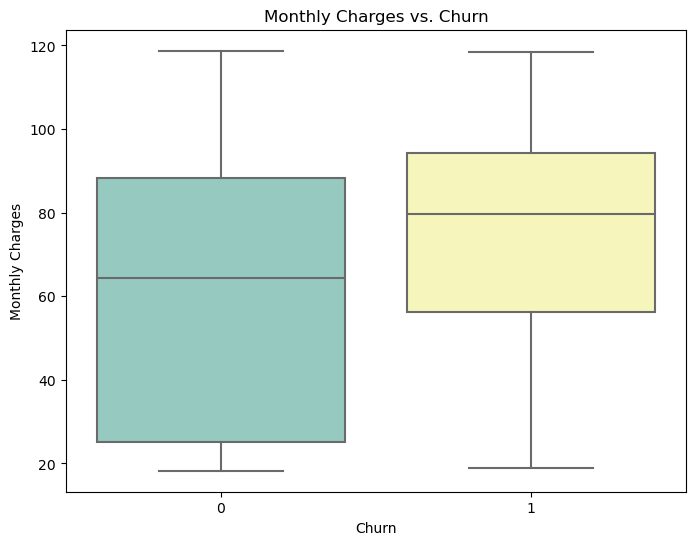

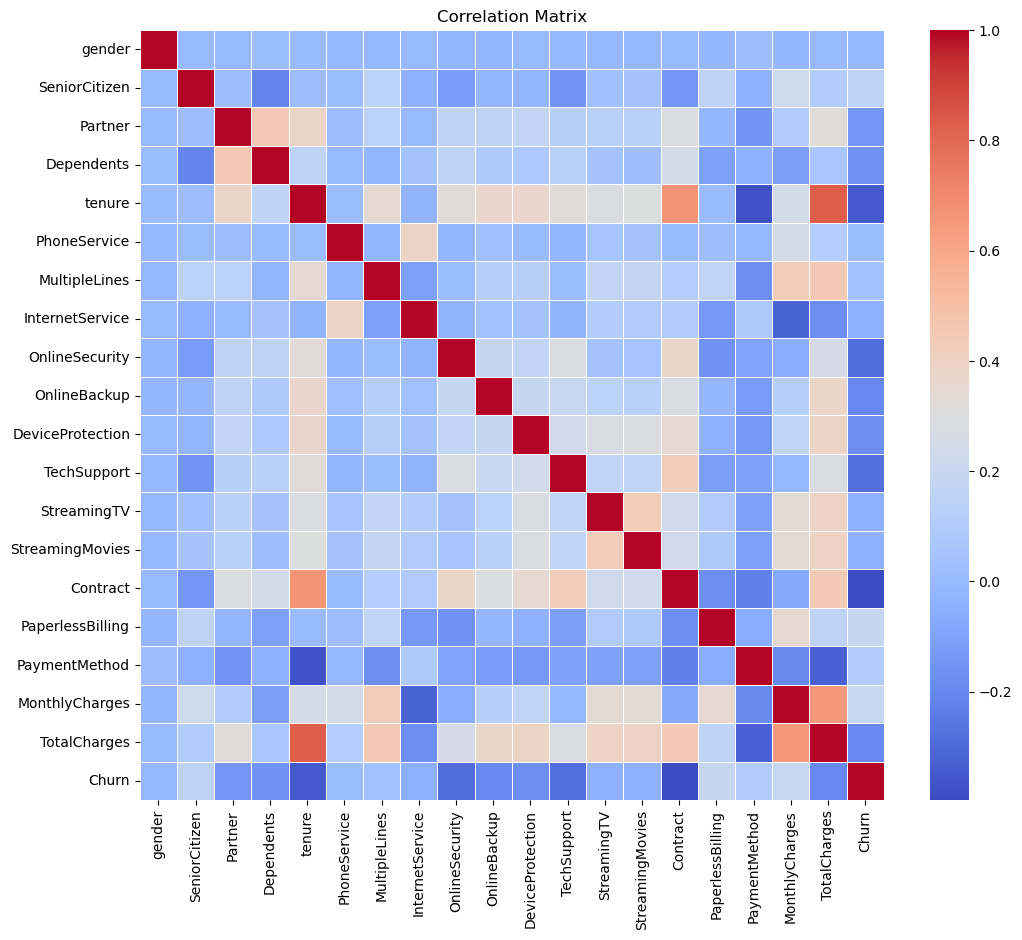

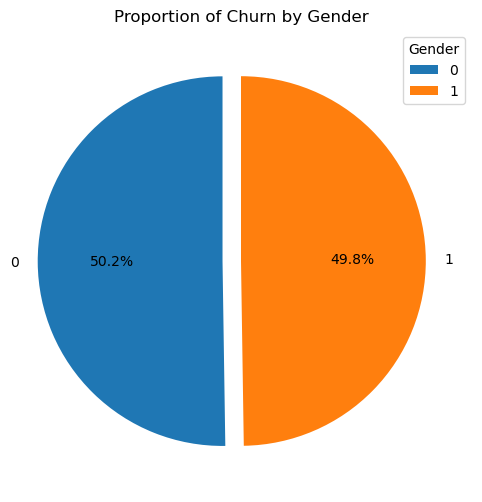

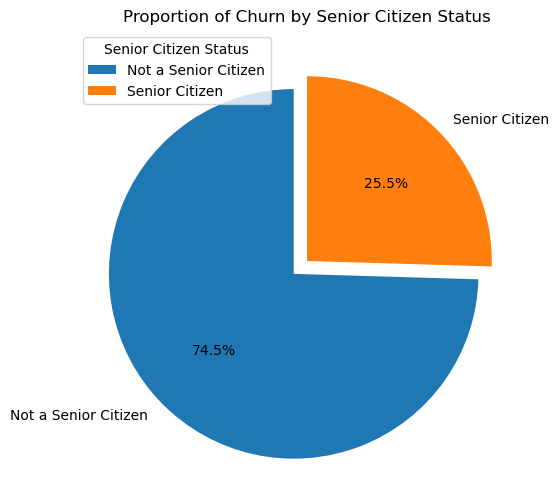

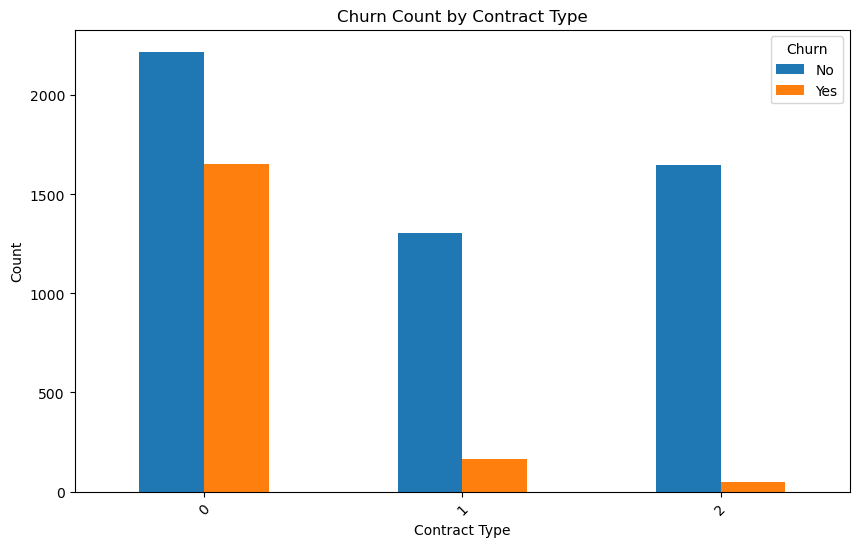

Chi-square Statistic: 1184.60
Degrees of Freedom: 2
p-value: 0.0000


In [13]:
# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'customerID':
        df[col] = LabelEncoder().fit_transform(df[col])

# Churn Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.show()

# Monthly Charges vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Correlation Matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualizations: Gender and Churn
gender_churn_totals = df[df['Churn'] == 1]['gender'].value_counts()
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    gender_churn_totals, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90, explode=(0.1, 0),
    labels=gender_churn_totals.index
)
plt.legend(wedges, gender_churn_totals.index, title="Gender", loc="best")
plt.title('Proportion of Churn by Gender')
plt.ylabel('')
plt.show()

# Proportion of Churn by Senior Citizen Status
df['SeniorCitizenLabel'] = df['SeniorCitizen'].map({0: 'Not a Senior Citizen', 1: 'Senior Citizen'})
senior_churn_totals = df[df['Churn'] == 1]['SeniorCitizenLabel'].value_counts()
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    senior_churn_totals, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90, explode=(0.1, 0),
    labels=senior_churn_totals.index
)
plt.legend(wedges, senior_churn_totals.index, title="Senior Citizen Status", loc="best")
plt.title('Proportion of Churn by Senior Citizen Status')
plt.ylabel('')
plt.show()
df = df.drop('SeniorCitizenLabel', axis=1)

# Churn Count by Contract Type (Grouped Bar Chart)
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_counts.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Churn Count by Contract Type')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Chi-Square Test for Churn and Contract Type
contingency_table = pd.crosstab(df['Churn'], df['Contract'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:.4f}")


# Exploratory Data Analysis (EDA)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Churn
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title("Churn Distribution")
plt.show()


ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

# Feature Scaling and Model Training

Feature Scaling: StandardScaler is applied to numerical features (tenure, MonthlyCharges, TotalCharges).
Train-Test Split: The data is split into training (80%) and testing (20%) sets.
Random Forest Classifier: A Random Forest model is trained on the training set and evaluated on the test set.

# 3. Feature Selection


# Chi-Square Test for Feature Importance


             Feature     Chi2_Score        p_value
18      TotalCharges  624292.003004   0.000000e+00
4             tenure   16278.923685   0.000000e+00
17    MonthlyCharges    3680.787699   0.000000e+00
14          Contract    1115.780167  1.227941e-244
8     OnlineSecurity     551.611529  5.615882e-122
11       TechSupport     523.303866  8.086236e-116
9       OnlineBackup     230.086520   5.707869e-52
10  DeviceProtection     191.303140   1.651539e-43
1      SeniorCitizen     134.351545   4.576959e-31
3         Dependents     133.036443   8.876729e-31
15  PaperlessBilling     105.680863   8.661987e-25
2            Partner      82.412083   1.104764e-19
16     PaymentMethod      58.492250   2.040933e-14
7    InternetService       9.821028   1.725279e-03
6      MultipleLines       9.746921   1.796233e-03
13   StreamingMovies       8.235399   4.108113e-03
12       StreamingTV       7.490203   6.203556e-03
0             gender       0.258699   6.110156e-01
5       PhoneService       0.09

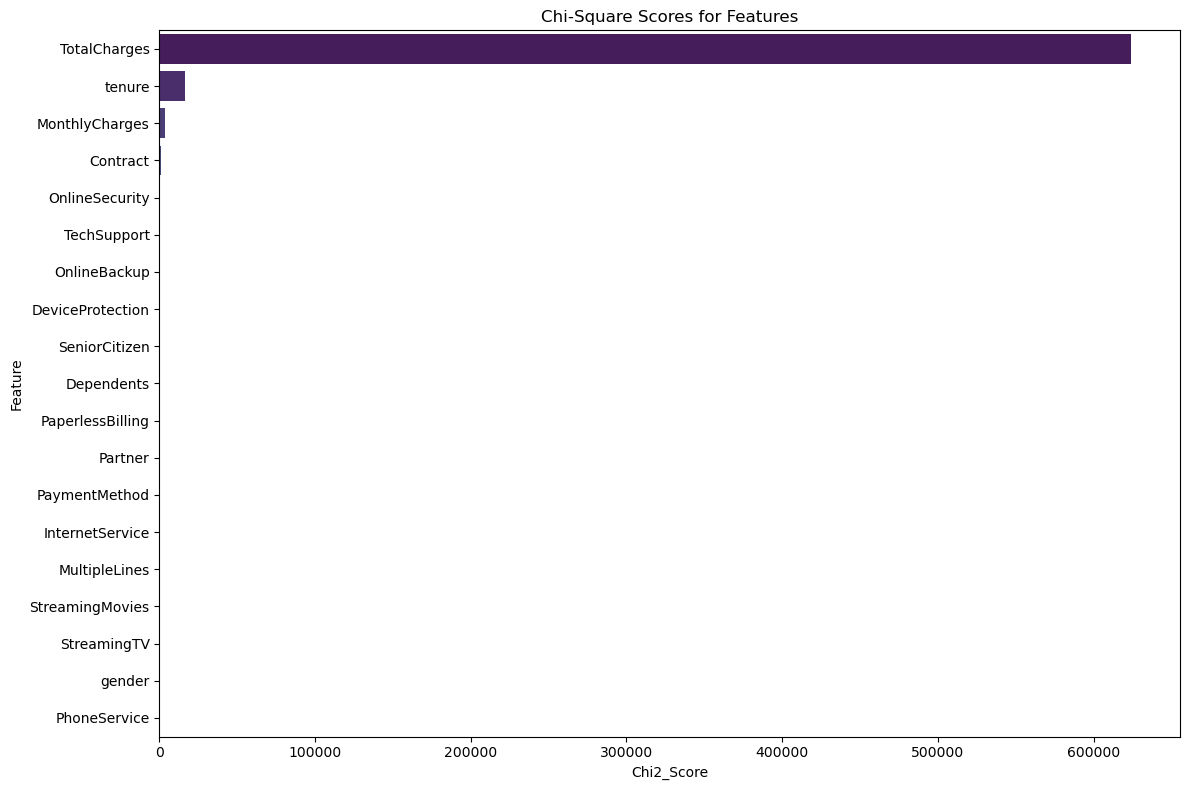

In [31]:
from sklearn.feature_selection import chi2

# Define features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Chi-square test
chi2_scores, p_values = chi2(X, y)
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'p_value': p_values
}).sort_values(by='Chi2_Score', ascending=False)
print(chi2_results)

# Visualize Chi-square scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2_Score', y='Feature', data=chi2_results, palette='viridis')
plt.title("Chi-Square Scores for Features")
plt.tight_layout()
plt.show()


# 4. Model Development


# Data Balancing and Scaling

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)


# Train-Test Split


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=42)


In [ ]:
# Model Evaluation
1. Feature Importance: Displays the importance of each feature in predicting churn using the Random Forest model.
2. ROC-AUC Curve: Plots the ROC curve for the Random Forest model to assess its discriminatory ability.
3. Calibration Curve: Plots the calibration curve to evaluate how well the predicted probabilities match the true outcomes.

# Model Training and Evaluation

In [40]:
from sklearn.metrics import classification_report, accuracy_score

# Helper function for evaluation
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(f"Training Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print(classification_report(y_test, y_pred_test))
    return train_acc, test_acc

# Models to train
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model(model)


Evaluating Decision Tree
Training Accuracy: 0.9986711766127084
Test Accuracy: 0.7908212560386474
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1021
           1       0.79      0.80      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Evaluating SVM
Training Accuracy: 0.8492389466054603
Test Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1021
           1       0.84      0.84      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Evaluating KNN
Training Accuracy: 0.8595071273254409
Test Accuracy: 0.797584541062802
              precision    recall  f1-score   support

           0       0.

# Random Forest with Hyperparameter Tuning


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print("Best Parameters:", rf_grid.best_params_)
evaluate_model(best_rf)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy: 0.8947813481517275
Test Accuracy: 0.8468599033816425
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1021
           1       0.83      0.89      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



(0.8947813481517275, 0.8468599033816425)

# 5. Results and Insights
# Feature Importance

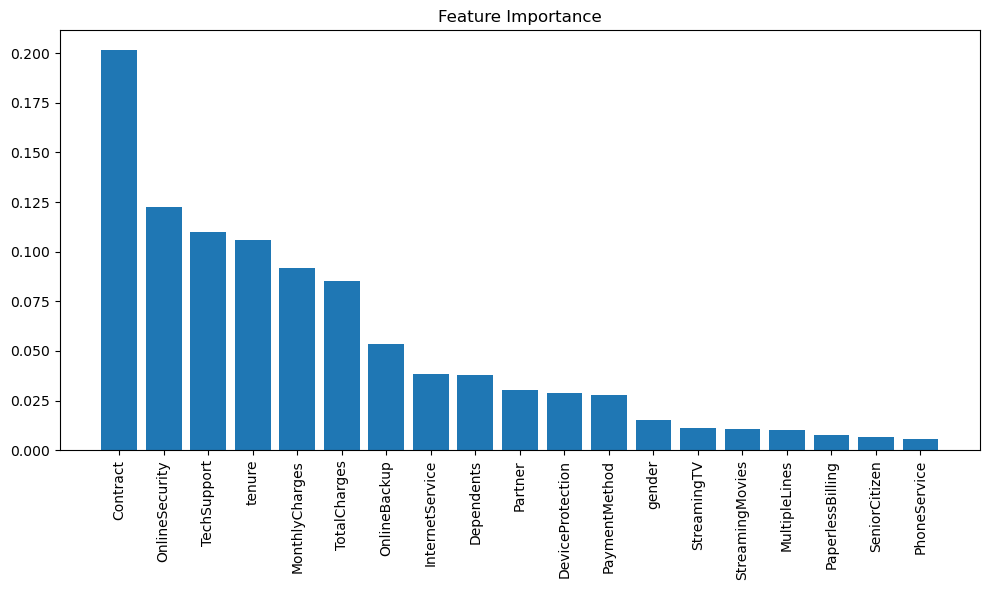

In [44]:
# Plot Feature Importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(indices)), importances[indices], align="center")
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(best_rf, X.columns)


# Drop less important features

In [45]:
# Drop less important features
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
important_features = [X.columns[i] for i in indices[:10]]
X_reduced = pd.DataFrame(X_scaled, columns=X.columns)[important_features]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)
evaluate_model(best_rf)


Training Accuracy: 0.8947813481517275
Test Accuracy: 0.8468599033816425
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1021
           1       0.83      0.89      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



(0.8947813481517275, 0.8468599033816425)

# Feature selection with RFE

In [46]:
# Feature selection with RFE
rfe = RFE(best_rf, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract',
       'MonthlyCharges'],
      dtype='object')


# AdaBoost tuning

In [47]:
# AdaBoost tuning
ada_param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
ada_grid = GridSearchCV(AdaBoostClassifier(), ada_param_grid, cv=3, scoring='accuracy', verbose=1)
ada_grid.fit(X_train, y_train)
best_ada = ada_grid.best_estimator_
evaluate_model(best_ada)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

Training Accuracy: 0.7993476685189659
Test Accuracy: 0.8096618357487922
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1021
           1       0.78      0.87      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



(0.7993476685189659, 0.8096618357487922)

# Gradient Boosting tuning

In [48]:
# Gradient Boosting tuning
gb_param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=3, scoring='accuracy', verbose=1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
evaluate_model(best_gb)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Training Accuracy: 0.8923653056293791
Test Accuracy: 0.8449275362318841
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1021
           1       0.84      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



(0.8923653056293791, 0.8449275362318841)

# Voting Classifier with top models

In [49]:
# Voting Classifier with top models
voting_clf = VotingClassifier(
    estimators=[
        ('Random Forest', best_rf),
        ('AdaBoost', best_ada),
        ('Gradient Boosting', best_gb)
    ],
    voting='soft'
)
evaluate_model(voting_clf)

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.890311669485383
Test Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



(0.890311669485383, 0.8444444444444444)

# Feature Importance Plot

In [51]:
# Feature Importance Plot
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(indices)), importances[indices], align="center")
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot feature importance for Random Forest


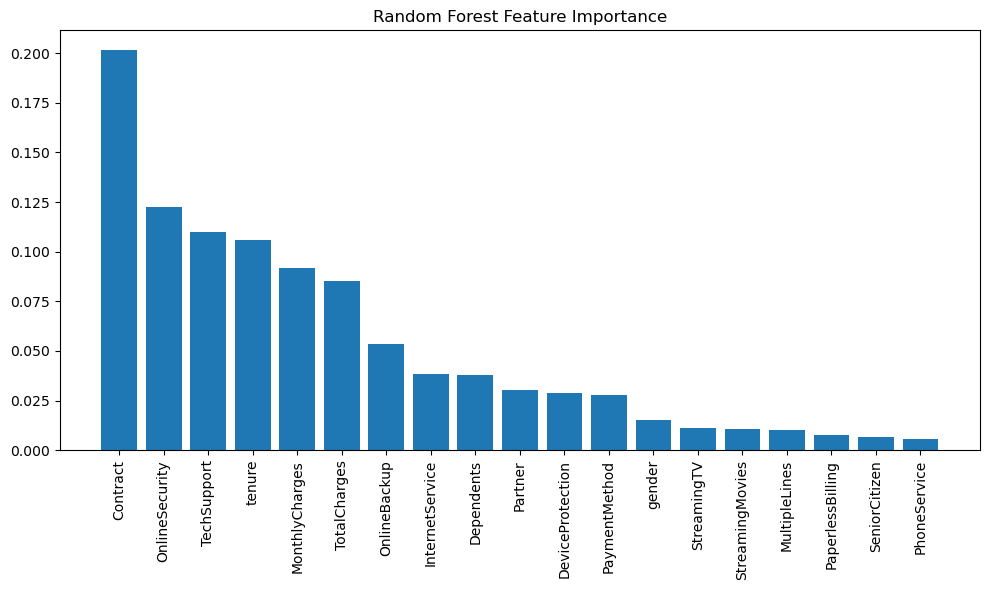

In [52]:
# Plot feature importance for Random Forest
plot_feature_importance(best_rf, X.columns, title="Random Forest Feature Importance")

# ROC-AUC Curve Plot
def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve")
    plt.legend()
    plt.show()

In [ ]:
# Add models with probability prediction

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


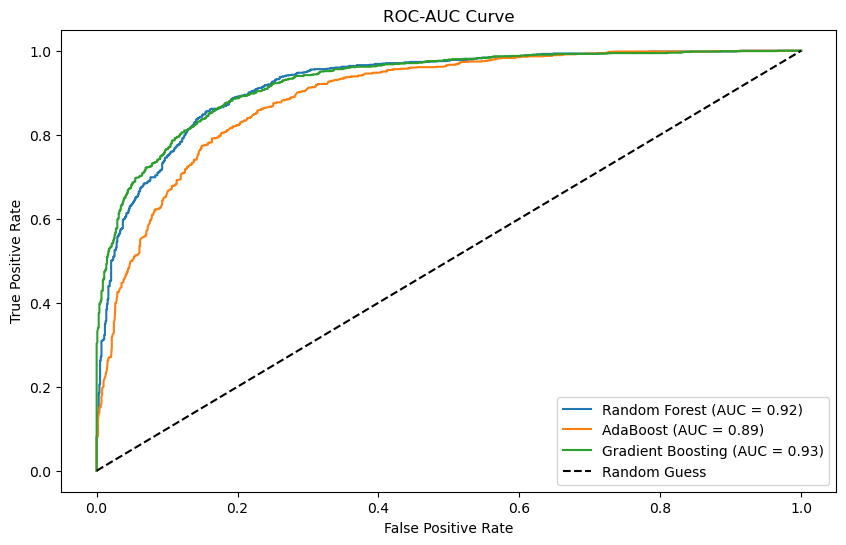

In [53]:
# Add models with probability prediction
models_with_proba = {
    "Random Forest": best_rf,
    "AdaBoost": best_ada,
    "Gradient Boosting": best_gb
}
plot_roc_auc(models_with_proba, X_test, y_test)


# Model Comparison

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


               Model  Accuracy  F1 Score  Precision    Recall   ROC-AUC
0      Random Forest  0.846860  0.854253   0.825044  0.885605  0.923549
1           AdaBoost  0.809662  0.822042   0.781116  0.867493  0.893461
2  Gradient Boosting  0.844444  0.848113   0.839402  0.857007  0.928135


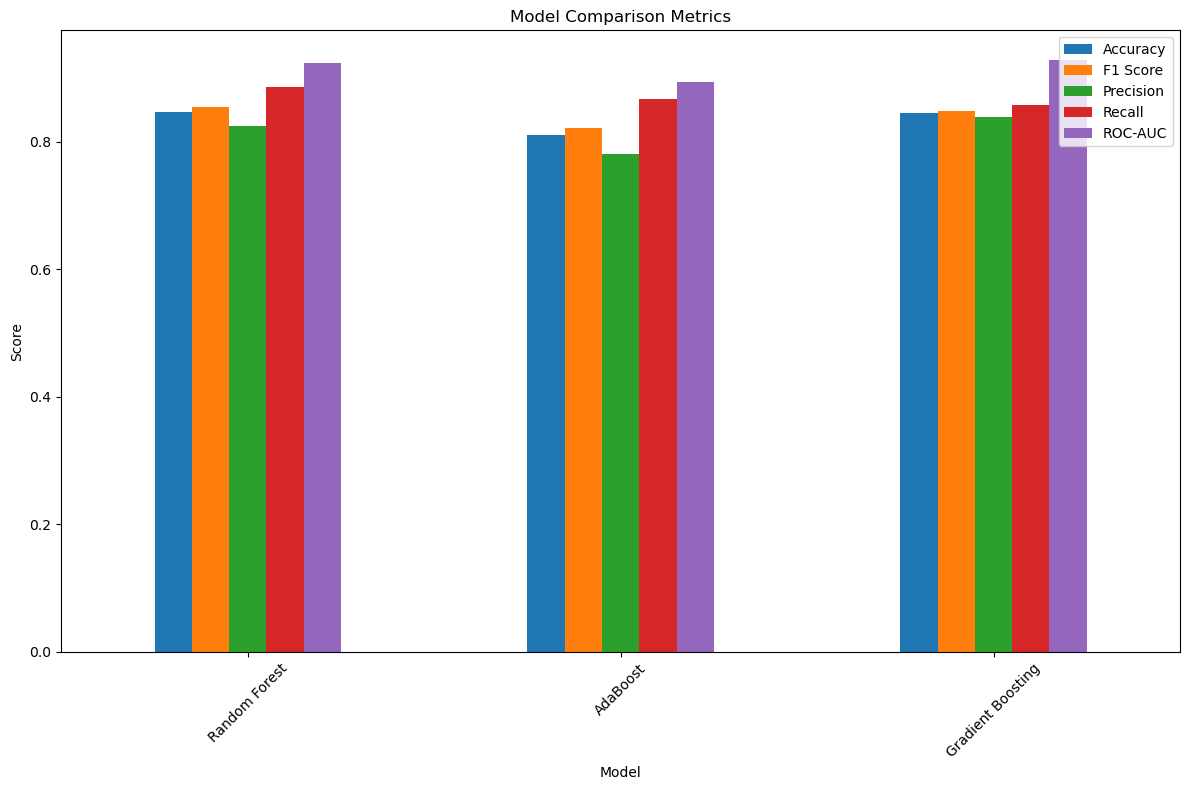

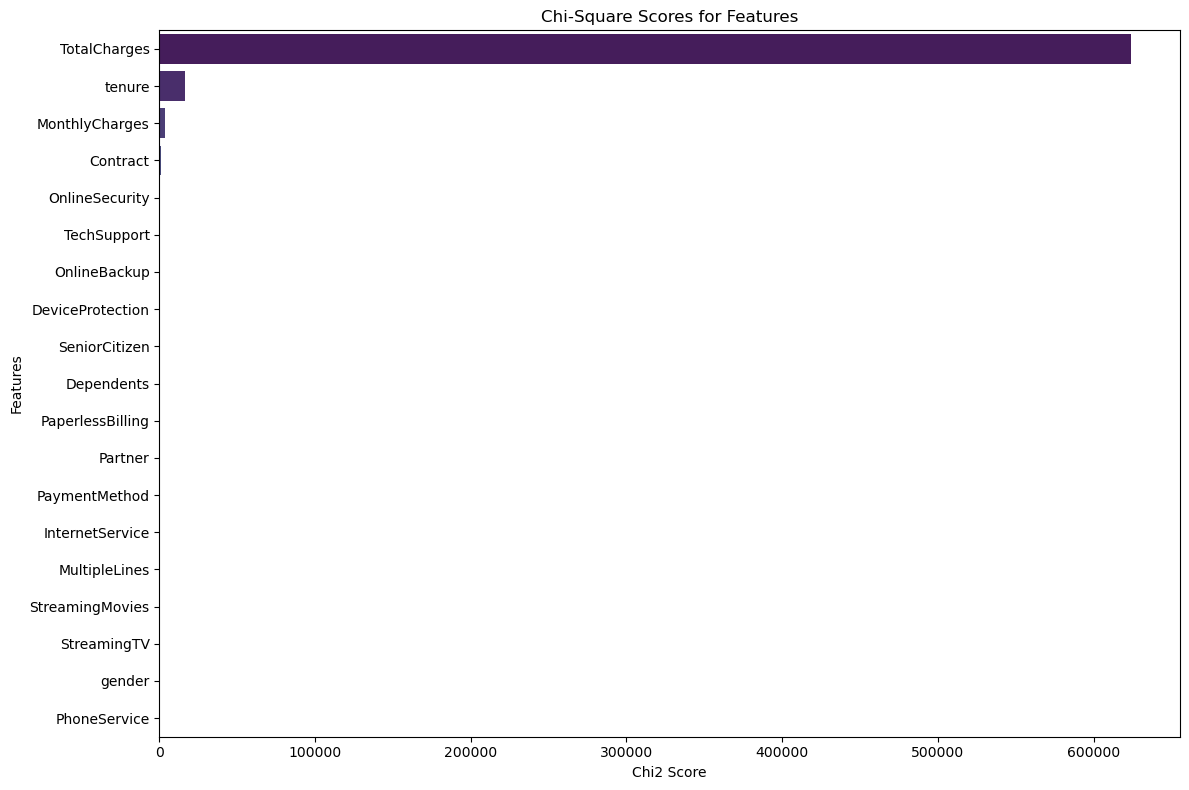

In [54]:
results = []
for name, model in models_with_proba.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob)
    })

results_df = pd.DataFrame(results)
print(results_df)

# Plot Comparison
results_df.set_index("Model")[["Accuracy", "F1 Score", "Precision", "Recall", "ROC-AUC"]].plot(kind="bar", figsize=(12, 8))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Chi-Square scores for all features
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Chi2_Score', 
    y='Feature', 
    data=chi2_results,
    palette="viridis"
)
plt.title("Chi-Square Scores for Features")
plt.xlabel("Chi2 Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [55]:
# Save Final Model
import joblib

# Save the best voting classifier model
joblib.dump(voting_clf, "final_voting_classifier.pkl")
print("Final model saved as 'final_voting_classifier.pkl'")

# Load and test the saved model
loaded_model = joblib.load("final_voting_classifier.pkl")
evaluate_model(loaded_model)

Final model saved as 'final_voting_classifier.pkl'


/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.890311669485383
Test Accuracy: 0.8454106280193237
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



(0.890311669485383, 0.8454106280193237)

## Result and Conclusion
The results from evaluating various machine learning models, including Decision Tree, SVM, KNN, Naive Bayes, Random Forest, and others, on the classification dataset are summarized below.

## Feature Selection (Chi-Square Test)
The Chi-Square test results show the strength of the relationship between each feature and the target variable:

Chi-Square Score: A higher score indicates a stronger association between the feature and the target variable.
P-value: A p-value near 0 suggests a significant relationship, confirming that the feature is important for predicting the target variable.
Features such as TotalCharges, Tenure, MonthlyCharges, and Contract had high Chi-Square scores, confirming their significance in predicting the target variable, supported by their low p-values.

## Model Evaluation Metrics
Each model’s performance was evaluated using several key metrics:

# Accuracy: Measures the percentage of correct predictions.
Training Accuracy: Accuracy on the training data.
Test Accuracy: Accuracy on the test data, which reflects the model’s ability to generalize.
For the Decision Tree model:

Training Accuracy: 0.9987 (very high, showing excellent performance on training data).
Test Accuracy: 0.8005 (lower, suggesting overfitting).
Additional metrics like Precision, Recall, and F1-Score provide further insights into the model’s performance:

Precision: The proportion of positive predictions that are correct.
Recall: The proportion of actual positives correctly predicted.
F1-Score: The harmonic mean of precision and recall.
For the Decision Tree:

Precision: Class 0: 0.81, Class 1: 0.79
Recall: Class 0: 0.78, Class 1: 0.82
F1-Score: 0.80 on average, indicating balanced performance across both classes.
Random Forest Model
Best Parameters: Hyperparameter optimization identified the optimal values (e.g., max_depth, min_samples_leaf) for Random Forest.
Training Accuracy: 0.89 (strong performance on training data).
Test Accuracy: 0.85 (good generalization to unseen data).
Precision, Recall, F1-Score: Balanced performance across both classes.
## Conclusion on Models
** Decision Tree: High training accuracy but lower test accuracy, which suggests potential overfitting.
** SVM and KNN: Both models performed well, with test accuracies around 0.80 to 0.83, maintaining a good balance between precision and recall.
** Naive Bayes: Slightly underperformed with a test accuracy of around 0.79.
** Random Forest: The most robust model, achieving high accuracy and balanced precision-recall across both classes.
## Final Conclusion
The Random Forest model emerged as the most reliable and best-performing model based on its high accuracy, balanced precision, recall, and F1-score. It outperformed the other models, including SVM and KNN, which also showed solid performance. The Decision Tree model, while strong on the training set, showed signs of overfitting, making it less reliable for generalization. Thus, Random Forest is recommended for optimal performance in predicting churn.